## Imports

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,mean_squared_error
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score,cross_val_predict
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


E-commerce is a huge business sector that allows customers to access a variety of goods and services with a few clicks. Many popular shopping platforms such as Amazon or Alibaba process millions of transactions annually. In recent years, due to the corona disease, online shopping has increased dramatically, therefore, the online shopping market has become very competitive and it is important for strong and innovative online shopping platforms.   
One possible way to increase online shopping transactions is to understand and respond to customers' behavior. According to sufficient online shopping data and machine learning techniques, it is possible to determine the purchase intention of website visitors, so in this exercise, we want to use machine learning algorithms in Marketing Analytics, which is one of the topics discussed in recent years. let's get to know each other more.

## Dataset

Before doing anything, we need to get familiar with Dataset. The desired dataset is located in the `customers_intention.csv` file. This dataset contains various information related to customer behavior on online shopping websites, which helps us to perform marketing analysis and understand related KPIs and metrics. This dataset contains feature vectors belonging to 12330 sessions, in the sense that each row shows the behavior of a customer to buy a product and has a total of 10 numerical features and 8 categorical features. 
Use the "Revenue" property as the class label.

in this section, what you have to do is as follows:
 - lead the dataset
 - print information of the dataset
 - plot number of data for each label in `Revenue` column.

In [56]:
# Load dataset
df = pd.read_csv('./Customers_intention.csv')
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [57]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [58]:
df.Revenue.describe()

count     12330
unique        2
top       False
freq      10422
Name: Revenue, dtype: object

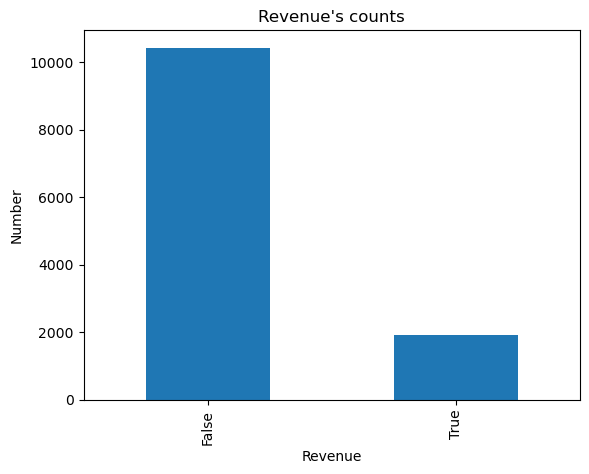

In [59]:
# plot number of data for each class label

#label = Revenue
revenue_count = df['Revenue'].value_counts()

revenue_count.plot(kind='bar')
plt.title('Revenue\'s counts');plt.xlabel('Revenue');plt.ylabel('Number');plt.show()

## Data Cleaning

Now, after reading the data, it is time to clean the data. At this stage, we need to do the necessary pre-processing to clean the dataset. Some of the things we suggest you do are as follows:
- Identification of null values
- Handling the null values of each column in an appropriate way
- one-hot encoding of categorical columns. you can use this [link](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) for one-hot encoding
And any pre-processing you want.

In [60]:
# identify and handle nan values
# Drop rows with any missing values
print(df.shape)
#for NaN values
df.dropna(inplace = True)
print(f"after dropping nans: {df.shape}")

#eliminate ? values
for (column_name , _) in df.items():
    
    mask = df[f"{column_name}"] == '?'
    
    df = df[~mask]
    print(f"after dropping ? value from {column_name}: {df.shape} ")

print(f"final shape {df.shape}")

(12330, 18)
after dropping nans: (12330, 18)
after dropping ? value from Administrative: (12330, 18) 
after dropping ? value from Administrative_Duration: (12330, 18) 
after dropping ? value from Informational: (12330, 18) 
after dropping ? value from Informational_Duration: (12330, 18) 
after dropping ? value from ProductRelated: (12330, 18) 
after dropping ? value from ProductRelated_Duration: (12330, 18) 
after dropping ? value from BounceRates: (12330, 18) 
after dropping ? value from ExitRates: (12330, 18) 
after dropping ? value from PageValues: (12330, 18) 
after dropping ? value from SpecialDay: (12330, 18) 
after dropping ? value from Month: (12330, 18) 
after dropping ? value from OperatingSystems: (12330, 18) 
after dropping ? value from Browser: (12330, 18) 
after dropping ? value from Region: (12330, 18) 
after dropping ? value from TrafficType: (12330, 18) 
after dropping ? value from VisitorType: (12330, 18) 
after dropping ? value from Weekend: (12330, 18) 
after droppi

no nan-values found!

In [61]:
# categorical encoding and one hot encoding

categories = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend"]
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[categories])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categories))

df = df.drop(categories, axis=1)
df = pd.concat([df, encoded_df], axis=1)


In [62]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Train/Test Split
- Divide the data into two parts, train and test. Assign `80%` of the data to the train section.
    - split in a `stratified` fashion. (Hint: you need to change a parameter in the corresponding method)

In [ ]:
# import train test split from sklearn

#already imported in imports

In [63]:
# train test split

x = df.drop('Revenue', axis=1)  
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1)

## Classification Using Regression

- Assign +1 to every instance of customer visit that led to a purchase and assign -1 to every visit that did not lead to a purchase.
- Using a regression model (univariate, multivariate, linear, polynomial, etc.), predict whether a cutomer's visit will lead to a purchase or not.
- How do you decide whether a visit will lead to a purchase based on the output of the model which is a real-valued number? 

In [64]:
# Assign +1 to every instance of customer visit that led to a purchase and assign -1 to every visit that did not lead to a purchase.
y_train = y_train.apply(lambda x: 1 if x else -1)
y_test = y_test.apply(lambda x: 1 if x else -1)

Accuracy: 0.8742903487429035
Mean Squared Error: 0.5028386050283861


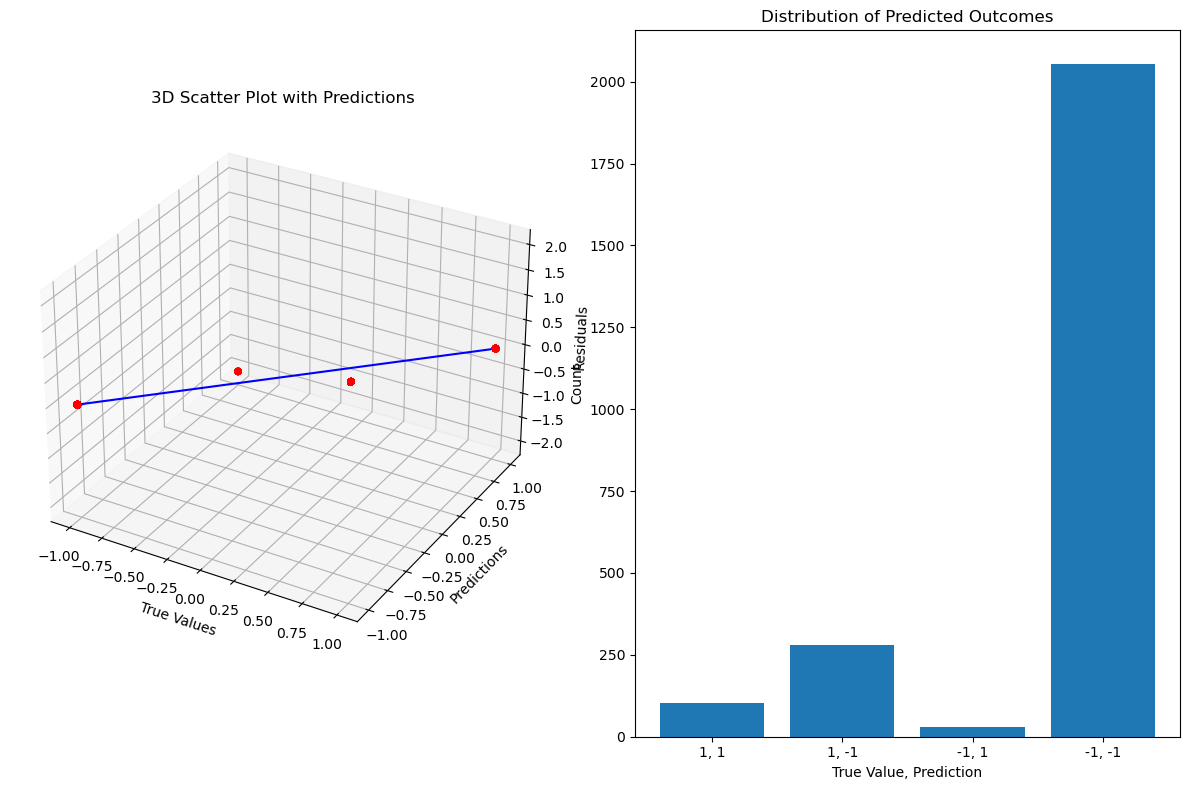

In [65]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

#accuracy
prediction = regression_model.predict(X_test)
prediction = np.where(prediction >= 0, 1, -1)

accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy}")

mse = mean_squared_error(y_test, prediction)
print(f"Mean Squared Error: {mse}")

residuals = y_test - prediction
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(121, projection='3d')

ax.scatter(y_test, prediction, residuals, c='r', marker='o')

line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x
line_z = line_x - line_x  # Zero residuals along this line
ax.plot(line_x, line_y, line_z, label='Ideal Prediction Line', color='blue')

ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
ax.set_zlabel('Residuals')
ax.set_title('3D Scatter Plot with Predictions')

ax2 = fig.add_subplot(122)
combinations = [(1, 1), (1, -1), (-1, 1), (-1, -1)]
counts = [np.sum((y_test == pair[0]) & (prediction == pair[1])) for pair in combinations]

ax2.bar(range(len(combinations)), counts, tick_label=[f"{x[0]}, {x[1]}" for x in combinations])
ax2.set_xlabel('True Value, Prediction')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Predicted Outcomes')

plt.tight_layout()
plt.show()

## Dimensionality Reduction
Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension. Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable (hard to control or deal with).


in this section you ar goinig to:
- plot datapoints in 2 dimensions using PCA
- Choose the best number of dimensions for PCA by plotting [cumulative explained variance ratio](https://medium.com/@megha.natarajan/understanding-cumulative-explained-variance-in-pca-with-python-653e3592a77c#:~:text=The%20Cumulative%20Explained%20Variance%20plot%20is%20a%20graphical%20representation%20that,the%20variance%20in%20the%20data.)
- Apply pca to the dataset with the number of dimensions you obtained in the previous section

*`don't remember you to standardize data before PCA transformation!`*

In [66]:
#standardization
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train) 
scaled_x_test = scaler.transform(X_test) 

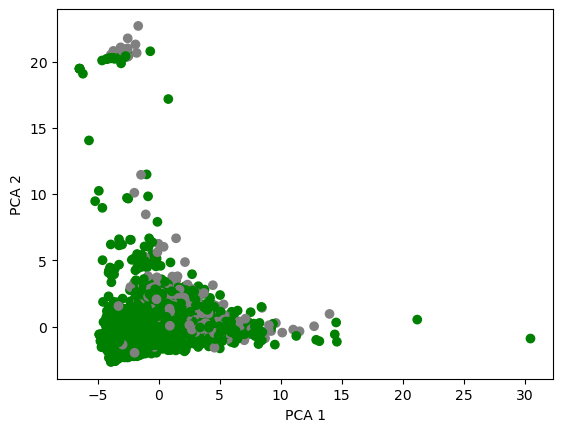

In [67]:

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_x_train) 

colors = y_train.map(lambda x: 'gray' if x == 1 else 'green')
plt.scatter(pca_components[:, 0], pca_components[:, 1], c = colors) 
plt.xlabel('PCA 1');plt.ylabel('PCA 2');plt.show();

## cumulative explained variance ratio

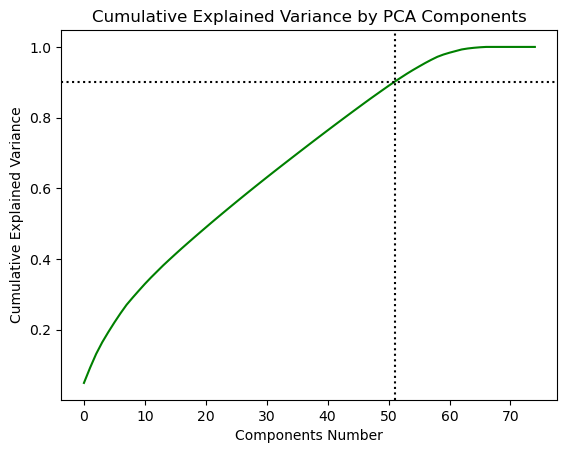

In [68]:
pca = PCA()
pca.fit(scaled_x_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_), color = "green")
plt.axhline(y=0.9, color='black', linestyle='dotted')  
plt.axvline(x=np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9), color='black', linestyle='dotted')
plt.title('Cumulative Explained Variance by PCA Components');plt.xlabel('Components Number');plt.ylabel('Cumulative Explained Variance');

plt.show()

## Apply PCA in 90% variance

In [69]:

components_optimal_number = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9) + 1

optimal_pca = PCA(n_components=components_optimal_number)
X_train_pca = optimal_pca.fit_transform(scaled_x_train)
X_test_pca = optimal_pca.transform(scaled_x_test) 

print(f"PCA components Number (90 percent variance) = {components_optimal_number}")
print(f"x.old.train.shape.attr_count = {X_train.shape[1]}, x.pca.train.shape.attr_count = {X_train_pca.shape[1]}")

PCA components Number (90 percent variance) = 52
x.old.train.shape.attr_count = 75, x.pca.train.shape.attr_count = 52


## Over-Sampling

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

in this section you are going to use `SMOTE` method for over-sampling data to get equal number of data for each data. After applying SMOTE plot number of data for each class again to see the diffrence.
- [over-smapling](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

In [30]:
! pip install --upgrade numpy scipy scikit-learn imbalanced-learn

In [77]:
smote = SMOTE(random_state=1)

# Apply SMOTE to the features and target variable
#X_resampled, y_resampled = smote.fit_resample(X_train_pca, y_train)  

from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train_pca, y_train)


SMOOTHED Revenue distribution:
-1    8338
 1    8338
Name: Revenue, dtype: int64


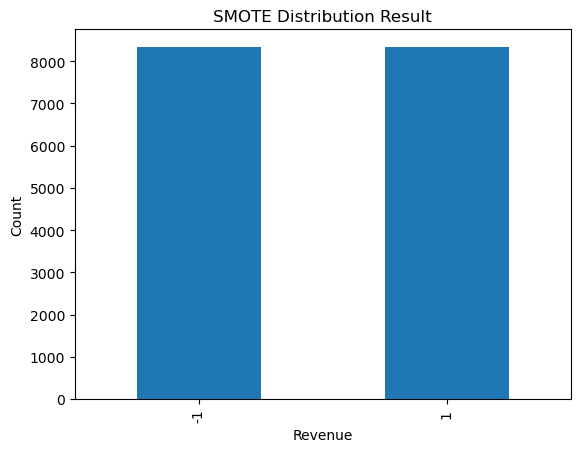

In [79]:
print(f"SMOOTHED Revenue distribution:\n{pd.Series(y_resampled).value_counts()}")

pd.Series(y_resampled).value_counts().plot(kind='bar')
plt.title('SMOTE Distribution Result');plt.xlabel('Revenue');plt.ylabel('Count');plt.show();


## Training Classifiers

Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

in this section you are going to train several cllassifiers like:
- `SVM`
- `KNN`
- `Logistic Regression`
- `Decision Tree`

Use the dimensionally reduced `train` data to train the specified classifiers. 
- for each classifier use `gridsearch` to find best hyper parameters.
    - use `cross validation` for grid search
- after finding best parameters for each classifier, use them to train a classifier with founded parameters.
    - again train your best classifiers with `cross valdiation`
- use a bar plot to show each classifier's `accuracy`, `precision`, `f1` and `roc_auc`.

In [ ]:
# Import Necessary libraries
#already imported in imports section

In [ ]:
# Train classifiers 


In [ ]:
# bar plot for scores

## Test your Model and Report results

choose the best model from last section based on the evalutiona metrics and bar plots and after that train the best classifier based on train data and test it's performance on test data. With this, we can see how good the model is on unseen data.

- print `classification report` and plot `confusion matrix` based on your model's predictions and the real labels.

In [ ]:
# import necessary Libraries

In [ ]:
# train the best model again and evaluate it on test data

In [ ]:
# classification report

In [ ]:
# confusion matrix

## Clustering

When analyzing customer behavior, clustering algorithms can help identify groups of customers with similar characteristics. Two popular clustering methods are K-means and DBSCAN.  

In [ ]:
#Kmeans (Use a method for finding optimal number of clusters)

In [ ]:
#DBSCAN